# Adquisición de los archivos XML del reloj

## Introducción

El primer paso para extraer los datos del reloj, fue mirar si la aplicación oficial del reloj xiaomi Mi Watch Color, tenía la posibilidad de exportar los datos de manera sencilla. Después de varias páginas encontradas, todas ellas coincidían en un método sencillo el cual no he sido capaz de utilizar, porque se trataba de la aplicación que usa el mismo reloj pero la versión Europea. El mio es la versión China que me compré hace 3 años por Aliexpress, lo que conlleva que la aplicación y sus funciones se vean reducidas por la alta capacidad de presión que ejerce el gobierno chino sobre las compañias tecnológicas. 

## Proceso

La falta de métodos para extraer los datos de mi reloj, me llevó a la búsqueda de otros caminos con aplicaciones de terceros. Al no tratarse de aplicaciones demasiado fiables
Indagando dentro de la aplicación oficial y después de encontrar que se podía conectar con aplicaciones de terceros decidí probar a conectarla con la aplicación oficial de Salud de Apple, la cual ofrece algo más de privacidad al menos a la hora de saber que mis datos los tiene una multinacional y no una empresa que no conozco. 

La siguiente acción tras vincular las dos aplicaciones fue extraer los datos en formato xml desde una opción en el apartado del perfil de la aplicación de apple. Esta acción te avisará de que no es seguro extraer la información además de todo tipo de avisos que te alertan para que apple se descuide de lo que le pueda pasar a tu información a partir de ese momento.


In [2]:
import xml.etree.ElementTree as element
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

Importamos el archivo xml con los datos del reloj y mediante la libreria de xml integrada en python, leemos y cargamos el archivo como un array mediante el atributo Record, el cual es el nombre que Apple ha dado a todos los datos que se han guardado en la aplicación.

In [3]:
tree = element.parse('./data_watchx/exportacion.xml') 
# for every health record, extract the attributes
root = tree.getroot()
record_list = [x.attrib for x in root.iter('Record')]

In [4]:
record_data = pd.DataFrame(record_list)

# convertimos a tipo fecha los valores del dataframe
for col in ['creationDate', 'startDate', 'endDate']:
    record_data[col] = pd.to_datetime(record_data[col])

# corregimos algunos de los valores que aparecen en el campo value, debido a que Apple no rellena la mayoría por falta de incompatibilidad con la aplicación del reloj
record_data['value'] = pd.to_numeric(record_data['value'], errors='coerce')

#rellenas con 1.0 para que sea más fácil manejarlos
record_data['value'] = record_data['value'].fillna(1.0)

# cambiamos algunos nombres que no era fácil trabajar con ellos.
record_data['type'] = record_data['type'].str.replace('HKQuantityTypeIdentifier', '')
record_data['type'] = record_data['type'].str.replace('HKCategoryTypeIdentifier', '')
record_data['startDate'] = record_data['startDate'].dt.tz_localize(None)
record_data.head()

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
0,Height,iPhone de Jav,16.1.2,cm,2022-12-03 17:16:18+01:00,2022-12-03 17:16:18,2022-12-03 17:16:18+01:00,189.0,NaN
1,BodyMass,iPhone de Jav,16.1.2,kg,2022-12-03 17:16:18+01:00,2022-12-03 17:16:18,2022-12-03 17:16:18+01:00,88.0,NaN
2,HeartRate,Mi Fitness,2,count/min,2022-12-15 22:24:46+01:00,2022-12-15 00:00:00,2022-12-15 01:00:00+01:00,56.0,NaN
3,HeartRate,Mi Fitness,2,count/min,2022-12-15 22:24:46+01:00,2022-12-15 00:00:00,2022-12-15 01:00:00+01:00,76.0,NaN
4,HeartRate,Mi Fitness,2,count/min,2022-12-15 22:24:46+01:00,2022-12-15 00:00:00,2022-12-15 01:00:00+01:00,88.0,NaN


Creamos y ajustamos cómo será nuestro dataframe final

In [5]:
heart_rate= record_data[record_data["type"]=='HeartRate']
heart_rate.index.name="index"
heart_rate=heart_rate.rename(columns={"value": "hr", "startDate": "datetime"})
visualizing_heart=heart_rate.drop(['type',"sourceName",'sourceVersion',"unit",'creationDate','endDate','device'],axis=1)

Dataframe Final el cual utilizaremos para sacar una gráfica y ver cómo fluctua mi frecuencia cardiaca

In [6]:
visualizing_heart

,datetime,hr
index,,
2,2022-12-15 00:00:00,56.0
3,2022-12-15 00:00:00,76.0
4,2022-12-15 00:00:00,88.0
5,2022-12-15 00:00:00,88.0
6,2022-12-15 01:00:00,48.0
...,...,...
1353,2022-12-17 08:00:00,56.0
1354,2022-12-17 08:00:00,69.0
1355,2022-12-17 08:00:00,118.0


C:\Users\javier\AppData\Local\Temp\ipykernel_5536\1043868294.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(heart_rate['datetime'][:40],heart_rate['hr'][:40])


(array([19341.        , 19341.08333333, 19341.16666667, 19341.25      ,
        19341.33333333, 19341.41666667, 19341.5       , 19341.58333333,
        19341.66666667, 19341.75      ]),
 [Text(19341.0, 0, '2022-12-15 00:00:00'),
  Text(19341.083333333332, 0, '2022-12-15 02:00:00'),
  Text(19341.166666666668, 0, '2022-12-15 04:00:00'),
  Text(19341.25, 0, '2022-12-15 06:00:00'),
  Text(19341.333333333332, 0, '2022-12-15 08:00:00'),
  Text(19341.416666666668, 0, '2022-12-15 10:00:00'),
  Text(19341.5, 0, '2022-12-15 12:00:00'),
  Text(19341.583333333332, 0, '2022-12-15 14:00:00'),
  Text(19341.666666666668, 0, '2022-12-15 16:00:00'),
  Text(19341.75, 0, '2022-12-15 18:00:00')])

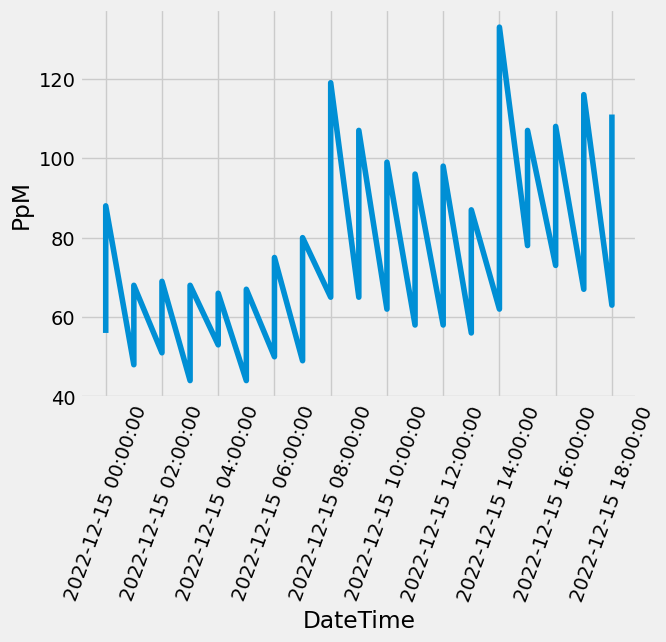

In [7]:
import matplotlib.dates as dates
plt.plot(heart_rate['datetime'][:40],heart_rate['hr'][:40])
plt.xlabel('DateTime')
plt.ylabel('PpM')
formatter = dates.DateFormatter('%Y-%m-%d %H:%M:%S') 
# plt.autoscale(enable=True, axis='x', tight=True)#plt.axis('tight')
plt.gcf().axes[0].xaxis.set_major_formatter(formatter)
plt.xticks(rotation=70)